## Imports

In [1]:
from datasets import load_dataset, Dataset
from tokenizers import Tokenizer, AddedToken, Regex
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import Split
from tokenizers.normalizers import Lowercase
from transformers import PreTrainedTokenizerFast

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
from tqdm import tqdm

In [3]:
DATASET_REPO_ID = "isek-ai/danbooru-tags-2024"
DATASET_REVISION = "202403-at20240423"
DATASET_SPLIT = "train"

## Load dataset

In [13]:
def prepare_dataset():
    ds = load_dataset(DATASET_REPO_ID, revision=DATASET_REVISION, split=DATASET_SPLIT)
    print(ds)
    return ds


ds = prepare_dataset()

Dataset({
    features: ['id', 'copyright', 'character', 'artist', 'general', 'meta', 'rating', 'score', 'image_width', 'image_height', 'created_at'],
    num_rows: 7245334
})


In [4]:
def load_from_json(path: str):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def save_to_json(data, path: str):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

## Investigate the dataset

In [8]:
def get_count_map(column_name: str):
    count_map = {}

    for i, text in tqdm(enumerate(ds[column_name])):
        if text is None:
            continue
        for tag in text.split(", "):
            if tag not in count_map:
                count_map[tag] = 1
            count_map[tag] += 1

    count_map = {
        k: v for k, v in sorted(count_map.items(), key=lambda x: x[1], reverse=True)
    }
    return count_map


general_tags_count_map = get_count_map("general")
save_to_json(general_tags_count_map, "../data/general_tags_count_map.json")
general_tags_count_map

7245334it [00:31, 227864.17it/s]


{'1girl': 5151040,
 'solo': 4300766,
 'long hair': 3688023,
 'breasts': 2915219,
 'looking at viewer': 2750314,
 'blush': 2519595,
 'smile': 2400663,
 'open mouth': 1975480,
 'short hair': 1924593,
 'blue eyes': 1507373,
 'simple background': 1455155,
 'shirt': 1419496,
 'skirt': 1342487,
 'large breasts': 1342288,
 'blonde hair': 1320888,
 'multiple girls': 1316184,
 'brown hair': 1278200,
 'black hair': 1244020,
 'long sleeves': 1228477,
 'white background': 1191057,
 'hair ornament': 1189740,
 '1boy': 1135945,
 'gloves': 1131381,
 'red eyes': 1092045,
 'dress': 1065770,
 'holding': 1052820,
 'hat': 1040047,
 'thighhighs': 1037194,
 'bow': 997680,
 'navel': 982793,
 'animal ears': 967270,
 'ribbon': 944790,
 'hair between eyes': 942514,
 'closed mouth': 903803,
 '2girls': 868070,
 'cleavage': 858171,
 'jewelry': 847092,
 'bare shoulders': 827841,
 'very long hair': 794678,
 'sitting': 793584,
 'twintails': 778521,
 'medium breasts': 776378,
 'standing': 751852,
 'brown eyes': 750867,

In [5]:
# cached data
general_tags_count_map = load_from_json("../data/general_tags_count_map.json")

### plot the distribution of counts

#### general

In [11]:
# plot the distribution of counts
general_tags_counts = [count for name, count in general_tags_count_map.items()]

In [12]:
general_tags_counts[0]

5151040

In [13]:
len(general_tags_counts)

75516

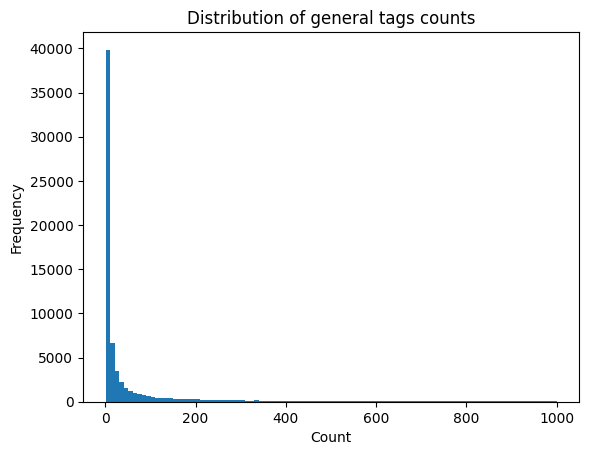

In [14]:
plt.hist(general_tags_counts, bins=100, range=(1, 1000))
# plt.yscale("log")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Distribution of general tags counts")
plt.show()

In [59]:
popular_general_tags = [
    name for name, count in general_tags_count_map.items() if count > 200
]
save_to_json(popular_general_tags, "../data/popular_general_tags.json")
len(popular_general_tags)

13391

#### copyright tags

In [17]:
copyright_tags_count_map = get_count_map("copyright")
save_to_json(copyright_tags_count_map, "../data/copyright_tags_count_map.json")
copyright_tags_count_map

7245334it [00:02, 2565214.64it/s]


{'original': 1001161,
 'touhou': 843086,
 'kantai collection': 470975,
 'fate (series)': 294389,
 'pokemon': 216703,
 'fate/grand order': 213719,
 'idolmaster': 202008,
 'genshin impact': 173789,
 'hololive': 168384,
 'blue archive': 166523,
 'vocaloid': 135192,
 'azur lane': 116048,
 'idolmaster cinderella girls': 112541,
 'arknights': 111135,
 'umamusume': 89242,
 'fire emblem': 74849,
 'mahou shoujo madoka magica': 64695,
 'love live!': 64211,
 'final fantasy': 64085,
 'girls und panzer': 60547,
 "girls' frontline": 56331,
 'mahou shoujo madoka magica (anime)': 52350,
 'nijisanji': 49885,
 'precure': 48562,
 'hololive english': 47032,
 'honkai (series)': 46836,
 'kemono friends': 45125,
 'granblue fantasy': 44207,
 'jojo no kimyou na bouken': 43181,
 'gundam': 42047,
 'danganronpa (series)': 39141,
 'fate/stay night': 38409,
 'idolmaster (classic)': 35018,
 'love live! school idol project': 32729,
 'idolmaster shiny colors': 32183,
 'persona': 28706,
 'indie virtual youtuber': 28194

In [6]:
copyright_tags_count_map = load_from_json("../data/copyright_tags_count_map.json")

In [19]:
copyright_tags_counts = [count for name, count in copyright_tags_count_map.items()]

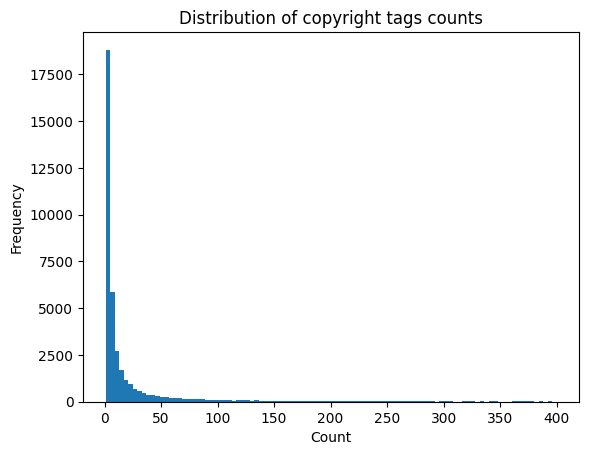

In [29]:
# plot
plt.hist(copyright_tags_counts, bins=100, range=(1, 400))
# plt.yscale("log")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Distribution of copyright tags counts")
plt.show()

In [60]:
popular_copyright_tags = [
    # 登場回数100回未満ののコピーライトタグは、プロンプトに入れても生成されない可能性が高いため、除外する
    name
    for name, count in copyright_tags_count_map.items()
    if count > 100
]
save_to_json(popular_copyright_tags, "../data/popular_copyright_tags.json")
len(popular_copyright_tags)

3739

#### charachter tags

In [24]:
character_tags_count_map = get_count_map("character")
save_to_json(character_tags_count_map, "../data/character_tags_count_map.json")
character_tags_count_map

7245334it [00:03, 1897649.01it/s]


{'hatsune miku': 90614,
 'hakurei reimu': 73337,
 'kirisame marisa': 66572,
 'remilia scarlet': 49291,
 'flandre scarlet': 48100,
 'izayoi sakuya': 43835,
 'admiral (kancolle)': 37033,
 'artoria pendragon (fate)': 35397,
 'kochiya sanae': 33864,
 'alice margatroid': 33486,
 'patchouli knowledge': 33167,
 'konpaku youmu': 32959,
 'cirno': 32821,
 'komeiji koishi': 31750,
 'yakumo yukari': 30853,
 'shameimaru aya': 27234,
 'reisen udongein inaba': 25679,
 'fujiwara no mokou': 25513,
 'komeiji satori': 24513,
 'akemi homura': 24032,
 'hong meiling': 23987,
 'kaname madoka': 23125,
 'saigyouji yuyuko': 22972,
 'inubashiri momiji': 21459,
 'kaga (kancolle)': 20968,
 'yakumo ran': 19075,
 'kagamine rin': 19042,
 'kaenbyou rin': 18215,
 'konpaku youmu (ghost)': 18182,
 'moriya suwako': 18020,
 'rumia': 17941,
 'shimakaze (kancolle)': 17625,
 'kazami yuuka': 17333,
 'miki sayaka': 17171,
 'reiuji utsuho': 17045,
 'chen': 16914,
 'ganyu (genshin impact)': 16635,
 'saber (fate)': 16471,
 'hibiki

In [7]:
character_tags_count_map = load_from_json("../data/character_tags_count_map.json")

In [9]:
character_tags_counts = [count for name, count in character_tags_count_map.items()]

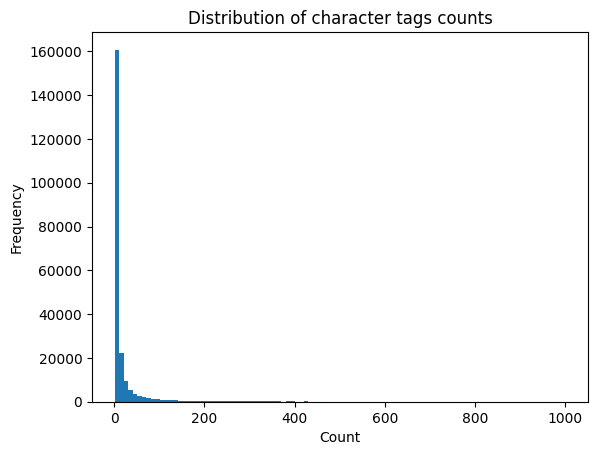

In [10]:
# plot
plt.hist(character_tags_counts, bins=100, range=(1, 1000))
# plt.yscale("log")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Distribution of character tags counts")
plt.show()

In [61]:
popular_character_tags = [
    # 登場回数100回未満ののキャラクタータグは、プロンプトに入れても生成されない可能性が高いため、除外する
    name
    for name, count in character_tags_count_map.items()
    if count > 100
]

save_to_json(popular_character_tags, "../data/popular_character_tags.json")
len(popular_character_tags)

13416

### show count of general tags for each post

In [14]:
general_tags_length = ds.map(
    lambda x: {
        "generaL_tags_length": (
            len(x["general"].split(", ")) if x["general"] is not None else 0
        ),
    },
    batched=False,
    remove_columns=ds.column_names,
)["generaL_tags_length"]
general_tags_length

Map:   0%|          | 0/7245334 [00:00<?, ? examples/s]

[61,
 43,
 41,
 42,
 42,
 18,
 48,
 40,
 43,
 68,
 29,
 35,
 41,
 31,
 29,
 29,
 38,
 36,
 38,
 19,
 28,
 32,
 17,
 47,
 36,
 39,
 28,
 20,
 29,
 24,
 39,
 30,
 41,
 26,
 20,
 28,
 21,
 26,
 24,
 18,
 25,
 28,
 36,
 28,
 21,
 31,
 26,
 25,
 32,
 24,
 23,
 16,
 15,
 18,
 24,
 17,
 32,
 21,
 34,
 35,
 21,
 26,
 20,
 22,
 22,
 30,
 32,
 20,
 17,
 18,
 19,
 17,
 17,
 28,
 25,
 28,
 17,
 23,
 21,
 18,
 18,
 16,
 44,
 27,
 32,
 21,
 31,
 25,
 40,
 9,
 23,
 23,
 17,
 26,
 26,
 28,
 25,
 21,
 20,
 28,
 28,
 26,
 34,
 24,
 25,
 20,
 31,
 42,
 66,
 69,
 47,
 41,
 38,
 36,
 20,
 22,
 40,
 24,
 23,
 27,
 24,
 33,
 31,
 7,
 32,
 17,
 21,
 17,
 27,
 44,
 29,
 51,
 35,
 16,
 25,
 30,
 35,
 25,
 45,
 36,
 22,
 23,
 36,
 44,
 23,
 23,
 42,
 29,
 32,
 25,
 17,
 31,
 39,
 48,
 38,
 19,
 17,
 27,
 29,
 25,
 31,
 11,
 20,
 26,
 47,
 48,
 37,
 45,
 11,
 19,
 9,
 23,
 21,
 26,
 17,
 27,
 13,
 25,
 26,
 27,
 31,
 23,
 37,
 27,
 20,
 20,
 31,
 28,
 17,
 25,
 13,
 41,
 25,
 18,
 22,
 29,
 18,
 29,
 20,
 21,
 27

In [15]:
general_tags_length_map = {}

for i, length in tqdm(enumerate(general_tags_length)):
    if length not in general_tags_length_map:
        general_tags_length_map[length] = 1
    general_tags_length_map[length] += 1

general_tags_length_map

7245334it [00:01, 5069889.96it/s]


{61: 17427,
 43: 93360,
 41: 108566,
 42: 101629,
 18: 205922,
 48: 60429,
 40: 117563,
 68: 8764,
 29: 213734,
 35: 164035,
 31: 199296,
 38: 135763,
 36: 153895,
 19: 213805,
 28: 220307,
 32: 190640,
 17: 197512,
 47: 66378,
 39: 126511,
 20: 220212,
 24: 231195,
 30: 207284,
 26: 228235,
 21: 226246,
 25: 230002,
 23: 230996,
 16: 186216,
 15: 172340,
 34: 172775,
 22: 228416,
 44: 85547,
 27: 224013,
 9: 80901,
 66: 10696,
 69: 8123,
 33: 181349,
 7: 53303,
 51: 45660,
 45: 78783,
 11: 116582,
 37: 145467,
 13: 145212,
 50: 49962,
 49: 55053,
 53: 37957,
 54: 34240,
 65: 11847,
 12: 132333,
 14: 158725,
 56: 28262,
 90: 1438,
 105: 479,
 10: 101316,
 97: 878,
 70: 7421,
 46: 71751,
 52: 41218,
 125: 171,
 75: 4657,
 60: 19008,
 6: 39515,
 59: 20974,
 57: 25663,
 5: 25204,
 8: 65494,
 4: 10174,
 72: 6087,
 76: 4479,
 55: 31132,
 84: 2150,
 120: 207,
 85: 2039,
 73: 5723,
 116: 249,
 92: 1259,
 187: 20,
 83: 2399,
 81: 2821,
 79: 3295,
 115: 282,
 2: 2135,
 157: 39,
 64: 13057,
 100

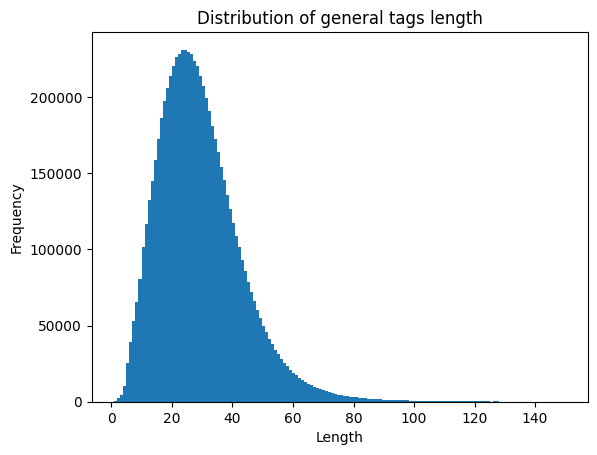

In [19]:
# plot
plt.hist(general_tags_length, bins=150, range=(1, 150))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Distribution of general tags length")
plt.show()

### show distribution of tags score

In [20]:
# get scores by rating
post_scores_rating_general = ds.filter(lambda x: x["rating"] == "g", batched=False)[
    "score"
]
post_scores_rating_sensitive = ds.filter(lambda x: x["rating"] == "s", batched=False)[
    "score"
]
post_scores_rating_questionable = ds.filter(
    lambda x: x["rating"] == "q", batched=False
)["score"]
post_scores_rating_explicit = ds.filter(lambda x: x["rating"] == "e", batched=False)[
    "score"
]

Filter:   0%|          | 0/7245334 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7245334 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7245334 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7245334 [00:00<?, ? examples/s]

In [21]:
print(len(post_scores_rating_explicit))
print(len(post_scores_rating_questionable))
print(len(post_scores_rating_sensitive))
print(len(post_scores_rating_general))

697912
891464
3983168
1672790


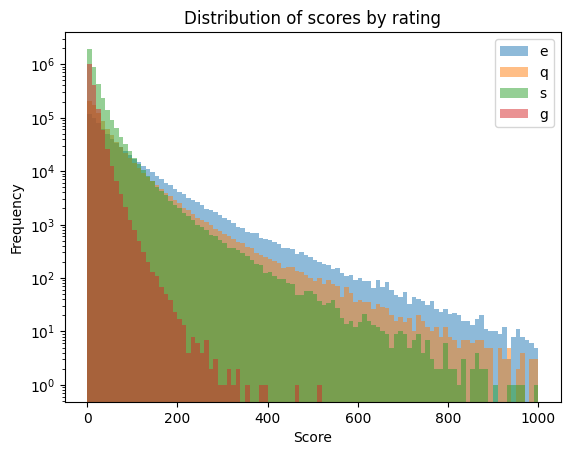

In [22]:
# plot all scores
plt.hist(post_scores_rating_explicit, bins=100, range=(0, 1000), alpha=0.5, label="e")
plt.hist(
    post_scores_rating_questionable, bins=100, range=(0, 1000), alpha=0.5, label="q"
)
plt.hist(post_scores_rating_sensitive, bins=100, range=(0, 1000), alpha=0.5, label="s")
plt.hist(post_scores_rating_general, bins=100, range=(0, 1000), alpha=0.5, label="g")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yscale("log")
plt.title("Distribution of scores by rating")
plt.show()

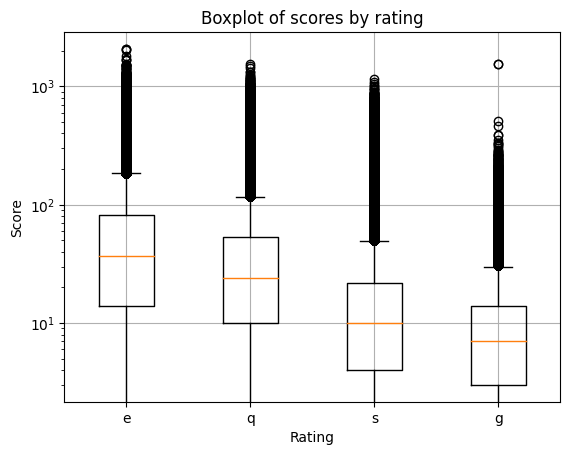

In [23]:
# boxplot
plt.boxplot(
    [
        post_scores_rating_explicit,
        post_scores_rating_questionable,
        post_scores_rating_sensitive,
        post_scores_rating_general,
    ],
    labels=[
        "e",
        "q",
        "s",
        "g",
    ],
)
plt.yscale("log")
plt.xlabel("Rating")
plt.ylabel("Score")
plt.title("Boxplot of scores by rating")
plt.grid()
plt.show()

In [24]:
# sort by score
post_scores_rating_explicit.sort()
post_scores_rating_questionable.sort()
post_scores_rating_sensitive.sort()
post_scores_rating_general.sort()

In [26]:
# group by ratio and get the boundary score of each group
# ~ 10%, ~ 25%, ~75%, ~90%


def get_boundary_scores(scores):
    return [scores[int(len(scores) * ratio)] for ratio in [0.1, 0.25, 0.75, 0.9]]


boundary_scores_explicit = get_boundary_scores(post_scores_rating_explicit)
boundary_scores_questionable = get_boundary_scores(post_scores_rating_questionable)
boundary_scores_sensitive = get_boundary_scores(post_scores_rating_sensitive)
boundary_scores_general = get_boundary_scores(post_scores_rating_general)

quality_score_map = {
    "general": boundary_scores_general,
    "sensitive": boundary_scores_sensitive,
    "questionable": boundary_scores_questionable,
    "explicit": boundary_scores_explicit,
}
save_to_json(quality_score_map, "../data/quality_score_map.json")
quality_score_map

{'general': [1, 3, 14, 25],
 'sensitive': [1, 4, 22, 45],
 'questionable': [4, 10, 53, 100],
 'explicit': [5, 14, 82, 153]}

In [27]:
def show_each_group_counts(scores, boundary_scores):
    counts = [0] * (len(boundary_scores) + 1)
    for score in scores:
        for i, boundary_score in enumerate(boundary_scores):
            if score <= boundary_score:
                counts[i] += 1
                break
        else:
            counts[-1] += 1
    return counts

In [28]:
print(show_each_group_counts(post_scores_rating_general, boundary_scores_general))

[197712, 250477, 815705, 253931, 154965]


In [29]:
print(show_each_group_counts(post_scores_rating_sensitive, boundary_scores_sensitive))

[426580, 682248, 1891494, 590871, 391975]


In [30]:
print(
    show_each_group_counts(
        post_scores_rating_questionable, boundary_scores_questionable
    )
)

[102752, 130667, 438717, 130283, 89045]


In [31]:
print(show_each_group_counts(post_scores_rating_explicit, boundary_scores_explicit))

[76912, 101380, 346393, 104269, 68958]


## Tokens

### Prepare special tokens

In [56]:
# common special tokens
BOS_TOKEN = "<|bos|>"
EOS_TOKEN = "<|eos|>"
PAD_TOKEN = "<|pad|>"
UNK_TOKEN = "<|unk|>"
SEP_TOKEN = "<|sep|>"
MASK_TOKEN = "<|mask|>"

# group
# RATING_START = "<rating>"
# RATING_END = "</rating>"
GENERAL_START = "<general>"
GENERAL_END = "</general>"
CHARACTER_START = "<character>"
CHARACTER_END = "</character>"
COPYRIGHT_START = "<copyright>"
COPYRIGHT_END = "</copyright>"

# rating
RATING_SFW = "<|rating:sfw|>"
RATING_NSFW = "<|rating:nsfw|>"
RATING_GENERAL = "<|rating:general|>"
RATING_SENSITIVE = "<|rating:sensitive|>"
RATING_QUESTIONABLE = "<|rating:questionable|>"
RATING_EXPLICIT = "<|rating:explicit|>"

# quality
QUALITY_BEST = "<|quality:best|>"
QUALITY_HIGH = "<|quality:high|>"
QUALITY_NORMAL = "<|quality:normal|>"
QUALITY_LOW = "<|quality:low|>"
QUALITY_WORST = "<|quality:worst|>"

# total tags legnth
LENGTH_VERY_SHORT = "<|legnth:very_short|>"
LENGTH_SHORT = "<|legnth:short|>"
LENGTH_MEDIUM = "<|legnth:medium|>"
LENGTH_LONG = "<|legnth:long|>"
LENGTH_VERY_LONG = "<|legnth:very_long|>"

# aspect ratio, inspired by DanTagGen
ASPECT_RATIO_ULTRA_WIDE = "<|aspect_ratio:ultra_wide|>"
ASPECT_RATIO_WIDE = "<|aspect_ratio:wide|>"
ASPECT_RATIO_SQUARE = "<|aspect_ratio:square|>"
ASPECT_RATIO_TALL = "<|aspect_ratio:tall|>"
ASPECT_RATIO_ULTRA_TALL = "<|aspect_ratio:ultra_tall|>"

# for SFT
INPUT_START = "<|input_start|>"
INPUT_END = "<|input_end|>"

# identity level
FLAG_KEEP_IDENTITY = "<|keep_identity|>"
IDENTITY_LEVEL_NONE = "<|identity:none|>"
IDENTITY_LEVEL_LAX = "<|identity:lax|>"
IDENTITY_LEVEL_STRICT = "<|identity:strict|>"


# reserved
RESERVED_TOKENS = [f"<|reserved_{i}|>" for i in range(64)]

In [70]:
SPECIAL_TOKENS = [
    BOS_TOKEN,
    EOS_TOKEN,
    PAD_TOKEN,
    UNK_TOKEN,
    SEP_TOKEN,
    MASK_TOKEN,
    #
    # RATING_START,
    # RATING_END,
    GENERAL_START,
    GENERAL_END,
    CHARACTER_START,
    CHARACTER_END,
    COPYRIGHT_START,
    COPYRIGHT_END,
    #
    RATING_SFW,
    RATING_NSFW,
    RATING_GENERAL,
    RATING_SENSITIVE,
    RATING_QUESTIONABLE,
    RATING_EXPLICIT,
    #
    QUALITY_BEST,
    QUALITY_HIGH,
    # QUALITY_NORMAL,
    QUALITY_LOW,
    QUALITY_WORST,
    #
    LENGTH_VERY_SHORT,
    LENGTH_SHORT,
    LENGTH_MEDIUM,
    LENGTH_LONG,
    LENGTH_VERY_LONG,
    #
    INPUT_START,
    INPUT_END,
    #
    FLAG_KEEP_IDENTITY,
    IDENTITY_LEVEL_NONE,
    IDENTITY_LEVEL_LAX,
    IDENTITY_LEVEL_STRICT,
    #
    *RESERVED_TOKENS,
]
assert len(set(SPECIAL_TOKENS)) == len(SPECIAL_TOKENS), SPECIAL_TOKENS
len(SPECIAL_TOKENS)

97

### Prepare general/character/copyright tags

In [71]:
GENERAL_TAG_TOKENS = popular_general_tags
CHARACTER_TAG_TOKENS = popular_character_tags
COPYRIGHT_TAG_TOKENS = popular_copyright_tags

### All

In [72]:
ALL_TOKENS = [
    *SPECIAL_TOKENS,
    *GENERAL_TAG_TOKENS,
    *CHARACTER_TAG_TOKENS,
    *COPYRIGHT_TAG_TOKENS,
]

assert len(set(ALL_TOKENS)) == len(ALL_TOKENS)

## Create a tokenizer!

In [73]:
tokenizer = Tokenizer(
    # 頭から順番に番号をつける
    WordLevel(vocab={tag: i for i, tag in enumerate(ALL_TOKENS)}, unk_token=UNK_TOKEN)
)

In [74]:
tokenizer.normalizer = Lowercase()

In [75]:
tokenizer.pre_tokenizer = Split(
    pattern=Regex(r",(?:\s)*"), behavior="removed", invert=False
)

In [76]:
# register special tokens
tokenizer.add_special_tokens(
    [
        AddedToken(
            content=token,
        )
        for token in SPECIAL_TOKENS
    ]
)

97

In [77]:
# padding
tokenizer.enable_padding(pad_token=PAD_TOKEN)

In [78]:
tokenizer.get_vocab_size()

30643

#### Test tokenizer

In [79]:
tokenizer.encode(
    "1girl, 2girls, aaa, long hair, very long hair, honkai: star rail, arknights, hogeeeeeeeee",
).tokens

['1girl',
 '2girls',
 '<|unk|>',
 'long hair',
 'very long hair',
 'honkai: star rail',
 'arknights',
 '<|unk|>']

In [ ]:
# save if you want
# tokenizer.save("./tmp/tokenizer.json")

#### Transformers tokenizer format

In [80]:
pretrained_tokenizer = PreTrainedTokenizerFast(tokenizer_object=tokenizer)

pretrained_tokenizer.bos_token = BOS_TOKEN
pretrained_tokenizer.eos_token = EOS_TOKEN
pretrained_tokenizer.pad_token = PAD_TOKEN
pretrained_tokenizer.unk_token = UNK_TOKEN
pretrained_tokenizer.sep_token = SEP_TOKEN
pretrained_tokenizer.mask_token = MASK_TOKEN

In [81]:
pretrained_tokenizer.encode_plus("1girl, cat ears, blue hair, swept bangs")

{'input_ids': [97, 249, 144, 436], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
pretrained_tokenizer.push_to_hub("p1atdev/dart-tokenizer-v2-encode", private=True)